# Buy Bitcoin Strategy

In [2]:
import pandas as pd
from openbb import obb
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
load_dotenv()
# Docs de OpenBB https://docs.openbb.co/platform/reference/crypto/price/historical

True

In [3]:
obb.user.credentials.fmp_api_key = os.environ['FMP']

In [4]:
btc_data = obb.crypto.price.historical("BTCUSD", start_date="2014-01-01", end_date="2024-01-31")

In [5]:
df_btc = btc_data.to_df()

In [6]:
df_btc.head(10)

,open,high,low,close,volume,vwap,adj_close,unadjusted_volume,change,change_percent,label,change_over_time
date,,,,,,,,,,,,
2014-01-01,737.15115,759.11040,737.15115,753.99000,7540.0,750.29,753.99000,7540.0,16.83885,2.28,"January 01, 14",0.0228
2014-01-02,750.11583,817.56149,750.00000,788.30421,14978.0,776.82,788.30421,14978.0,38.18838,5.09,"January 02, 14",0.0509
2014-01-03,784.68606,819.90000,771.17795,808.51778,60639.0,801.02,808.51778,60639.0,23.83172,3.04,"January 03, 14",0.0304
2014-01-04,808.42694,840.00000,783.02000,827.64784,27312.0,808.44,827.64784,27312.0,19.22090,2.38,"January 04, 14",0.0238
2014-01-05,828.69000,980.00000,827.41350,904.75000,48857.0,894.69,904.75000,48857.0,76.06000,9.18,"January 05, 14",0.0918
2014-01-06,908.24999,1019.00000,886.43973,919.11176,68933.0,956.52,919.11176,68933.0,10.86177,1.20,"January 06, 14",0.0120
2014-01-07,916.81972,945.00000,810.00000,810.00000,39690.0,882.26,810.00000,39690.0,-106.81972,-11.65,"January 07, 14",-0.1165
2014-01-08,810.00000,899.84281,788.00000,824.98287,15675.0,839.16,824.98287,15675.0,14.98287,1.85,"January 08, 14",0.0185
2014-01-09,825.56345,870.00000,807.42084,841.86934,6735.0,831.57,841.86934,6735.0,16.30589,1.98,"January 09, 14",0.0198


<Axes: xlabel='date'>

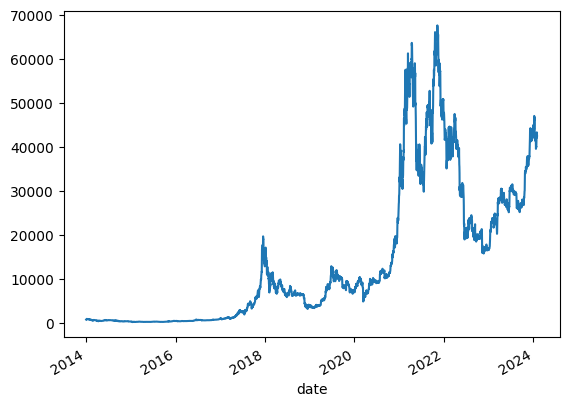

In [7]:
df_btc['close'].plot(kind='line')

In [8]:
df_btc.rename(columns={'close':'Close','open':'Open', 'high':'High', 'low':'Low','volume':'Volume'}, inplace=True)

## Crear Backtest

In [9]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 10)
        self.ma2 = self.I(SMA, price, 200)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()


bt = Backtest(df_btc, SmaCross, commission=.002,
              exclusive_orders=True)
stats = bt.run()
bt.plot()

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/lib/python3.10/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

/opt/conda/lib/python3.10/site-packages/backtesting/test/__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
/opt/conda/lib/python3.10/site-packages/backtesting/test/__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
/tmp/ipykernel_15055/2064709510.py:20: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC 

GridPlot(id='p1325', ...)

In [63]:
print(stats)

Start                     2014-01-01 00:00:00
End                       2024-01-31 00:00:00
Duration                   3682 days 00:00:00
Exposure Time [%]                   94.288822
Equity Final [$]               2855035.743468
Equity Peak [$]                3942867.063888
Return [%]                       28450.357435
Buy & Hold Return [%]             5543.056274
Return (Ann.) [%]                   75.290352
Volatility (Ann.) [%]              122.049011
Sharpe Ratio                         0.616886
Sortino Ratio                        1.825636
Calmar Ratio                         1.060512
Max. Drawdown [%]                  -70.994318
Avg. Drawdown [%]                  -10.136021
Max. Drawdown Duration     1023 days 00:00:00
Avg. Drawdown Duration       46 days 00:00:00
# Trades                                   20
Win Rate [%]                             40.0
Best Trade [%]                    3141.405472
Worst Trade [%]                    -22.800768
Avg. Trade [%]                    

In [36]:
help(SMA)

Help on function SMA in module backtesting.test:

SMA(arr: pandas.core.series.Series, n: int) -> pandas.core.series.Series
    Returns `n`-period simple moving average of array `arr`.

